In [1]:
from sklearn.mixture import GaussianMixture

import numpy as np

from matplotlib import pyplot as plt

In [2]:
def norm_dist(mean=(0,0,0), var=0.1, num=100):
    return np.random.multivariate_normal(mean=mean, cov=var*np.eye(len(mean)), size=num)

In [40]:
centers = [(0,0,0), (1,0,0), (1,0,1)]
var_list = [0.1, 0.1, 0.1]
num = 100

X_train = np.concatenate([norm_dist(center, var=var, num=num) for center,var in zip(centers, var_list)])
Y_train = np.concatenate([num*[i] for i in range(len(centers))])

In [41]:
model = GaussianMixture(n_components=len(centers), covariance_type="spherical")
model.fit(X_train)

GaussianMixture(covariance_type='spherical', n_components=3)

In [42]:
model.means_

array([[ 0.97923101,  0.01080512,  1.0136949 ],
       [-0.03066269, -0.04213506,  0.01799165],
       [ 1.03017791, -0.01365395,  0.05470139]])

In [43]:
model.covariances_

array([0.08762181, 0.09369676, 0.10037454])

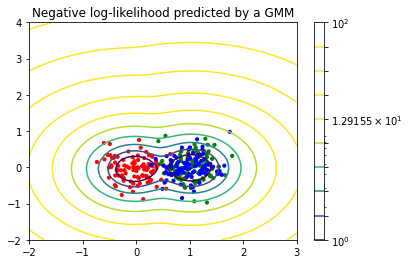

In [44]:
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(-2.0, 3.0)
y = np.linspace(-2.0, 4.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model.score_samples(np.pad(XX, pad_width=((0,0), (0,1)), mode="constant", constant_values=0))
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 2, 10)
)
CB = plt.colorbar(CS, shrink=1)
colors = np.array(["r", "g", "b"])
plt.scatter(X_train[:, 0], X_train[:, 1], 10.0, c=colors[Y_train])

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()